In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Must install the `emcee` package first:

`conda install -c astropy emcee`

In [3]:
import emcee

In [4]:
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf
    else:
        return (-1.5 * np.log(1 + beta**2) - np.log(sigma))

In [5]:
def log_like(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + (y-y_model)**2/sigma**2)

In [6]:
def log_posterior(theta, x, y):
    return log_prior(theta) + log_like(theta, x, y)

In [7]:
ndim     = 3
nwalkers = 50
nburn    = 1000
nsteps   = 2000
starting_guesses = np.random.rand(nwalkers, ndim)

In [8]:
np.random.seed(3242)
theta_true = (25, 0.5)
xdata = 100 * np.random.random(20)
ydata = theta_true[0] + theta_true[1] * xdata
ydata = np.random.normal(ydata, 10)

In [9]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[xdata, ydata])

In [10]:
sampler.run_mcmc(starting_guesses, nsteps, progress=True)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 889.43it/s]


State([[23.79472694  0.53143535  8.24070761]
 [28.19576467  0.48694817  5.70394106]
 [25.01545045  0.43149912  9.00504202]
 [25.39624277  0.5328469   5.77002242]
 [22.15323809  0.54755484 13.01309314]
 [15.45307743  0.66049397  7.29488257]
 [23.92851085  0.54001341  8.15612073]
 [21.51453603  0.53868299  7.27215797]
 [24.35638188  0.57676904  7.26497915]
 [25.00729483  0.49829791  6.86199435]
 [21.92701438  0.53533266  8.93495357]
 [21.89578854  0.58519467 10.62732629]
 [22.94504741  0.50586534  9.11628252]
 [24.96405697  0.4517803   8.90509076]
 [26.45141801  0.54544753  7.58291396]
 [22.05863394  0.61272738  7.36330057]
 [23.23210103  0.50977911  6.50271557]
 [25.91175202  0.50512055  7.66034774]
 [31.12601099  0.45784602  7.5912623 ]
 [17.54347842  0.62071522  8.37916696]
 [25.68174427  0.49670385  7.05920684]
 [23.90530904  0.50674042  7.38234794]
 [26.22222043  0.47138426  8.75807675]
 [26.53430723  0.55102907  9.94448679]
 [21.30373531  0.5538612   7.41451971]
 [25.45006328  0.51

In [11]:
samples = []
samples = sampler.chain[:, nburn:, :]
samples = samples.reshape(-1, ndim)

In [12]:
print(samples)

[[28.3559588   0.41074997  7.30308353]
 [28.13632906  0.41614645  7.29116408]
 [28.13632906  0.41614645  7.29116408]
 ...
 [27.48064314  0.47913842  8.78831719]
 [27.60805789  0.47584197  8.86236814]
 [27.06047215  0.50879519  8.25663867]]


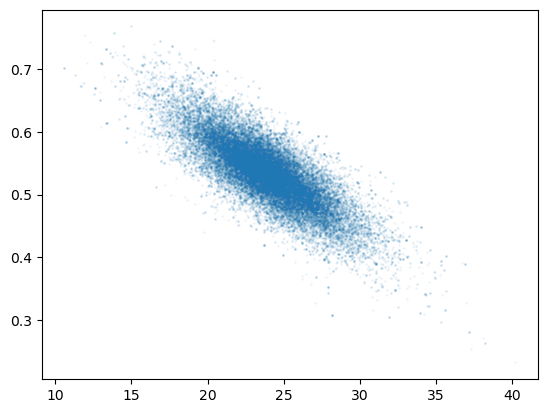

In [13]:
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.05, s=1)

In [14]:
asample, bsample, ssample = np.hsplit(samples,3)

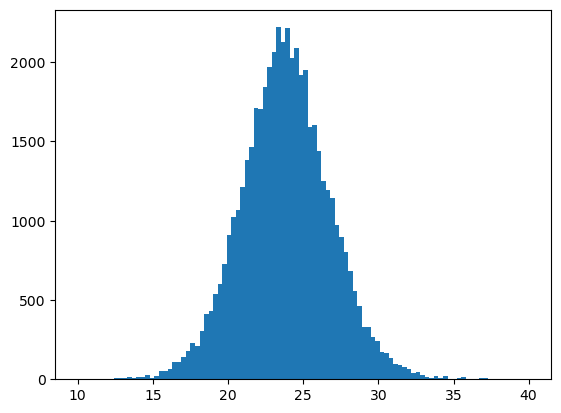

In [15]:
ahist = plt.hist(asample, range=[10,40], bins=100)

In [16]:
print(np.mean(asample), np.std(asample))

23.834147930307417 2.976695482452466
